# Interactive policy paradigms

## Preamble

In [1]:
# version
import datetime
print(datetime.date.today())

2018-06-13


In [2]:
%matplotlib notebook
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
run plots.py

In [4]:
# the states of the Markov Decsion Process (MDP)
state_opts = {"degraded": "degraded", "prosperous": "prosperous"}

# the parameters of the MDP model
axis_opts = {"Collapse probability δ": "δ",
             "Discount factor γ": "γ",
             "Recovery probability ρ": "ρ",
             "high reward rh": "rh",
             "low reward rl": "rl"}

## Paradigms classification 
paradigm combinations

### Interactive plot

tune the parameters if the figure is not visiable after executing the cell below

In [6]:
interact(plot_PolicyCombinations,
         δ=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0),
         ρ=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.2),
         γ=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0),
         rh=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0),
         rl=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
         rmin=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=0.2),
         xaxis=widgets.Dropdown(options=axis_opts, value="δ"),
         yaxis=widgets.Dropdown(options=axis_opts, value="γ"),
         prec=widgets.IntSlider(min=10, max=750, step=1, value=500));

interactive(children=(FloatSlider(value=1.0, description='δ', max=1.0), FloatSlider(value=0.2, description='ρ'…

 <img src="Paradigms_Legend.png", width=300>

## Policy classification

### Figure legend

<IPython.core.display.Javascript object>


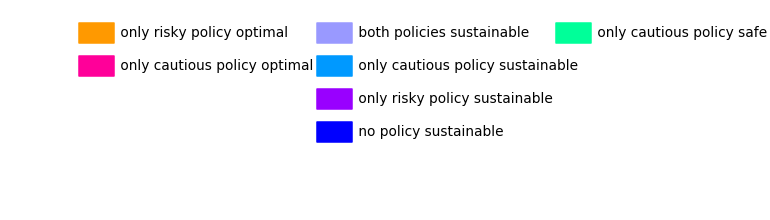

In [7]:
fig = plt.figure(figsize=(7,2))
ax = plt.gca()
ax.axis('off');  # clear x- and y-axes

# colors
ov = 0.6
risky_opt_color = (1.0, ov, 0)
cautious_opt_color = (1.0, 0, ov)
both_sus_color = (ov, ov, 1.0)
cautious_sus_color = (0.0, ov, 1.0)
risky_sus_color = (ov, 0.0, 1.0)
non_sus_color = (0.0, 0.0, 1.0)
cautious_safe_color = (0.0, 1.0, ov)

# Legend
prec = 10
lfontsize = 9
dy = 0.15
legendtopbottom = 0.8
# - left column
left = 0.1
ro = fig.add_axes((left, legendtopbottom, 0.05,0.1), frameon=False,
                  xticks=[], yticks=[])
ro.fill_between(np.linspace(0,1,prec), 0, 1, color=risky_opt_color)
ro.annotate(" only risky policy optimal", (1.0, 0.5), xycoords="axes fraction",
            ha="left", va="center", fontsize=lfontsize)  
so= fig.add_axes((left, legendtopbottom-dy, 0.05,0.1), frameon=False,
                 xticks=[], yticks=[])
so.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_opt_color)
so.annotate(" only cautious policy optimal", (1.0, 0.5), xycoords="axes fraction",
            ha="left", va="center", fontsize=lfontsize)

# - mid column
left = 0.41
bs = fig.add_axes((left, legendtopbottom, 0.05,0.1), frameon=False,
                  xticks=[], yticks=[])
bs.fill_between(np.linspace(0,1,prec), 0, 1, color=both_sus_color)
bs.annotate(" both policies sustainable", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)
cs = fig.add_axes((left, legendtopbottom-dy, 0.05,0.1), frameon=False,
                  xticks=[], yticks=[])
cs.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_sus_color)
cs.annotate(" only cautious policy sustainable", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

rs = fig.add_axes((left, legendtopbottom-2*dy, 0.05,0.1), frameon=False,
                  xticks=[], yticks=[])
rs.fill_between(np.linspace(0,1,prec), 0, 1, color=risky_sus_color)
rs.annotate(" only risky policy sustainable", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

ns = fig.add_axes((left, legendtopbottom-3*dy, 0.05,0.1), frameon=False,
                  xticks=[], yticks=[])
ns.fill_between(np.linspace(0,1,prec), 0, 1, color=non_sus_color)
ns.annotate(" no policy sustainable", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

# - right column
left = 0.72
bsos = fig.add_axes((left, legendtopbottom, 0.05,0.1), frameon=False,
                    xticks=[], yticks=[])
bsos.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_safe_color)
bsos.annotate(" only cautious policy safe", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)
plt.savefig("PolicyLegend.png")

### Interactive plot

In [8]:
interact(plot_policies,
         δ=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0),
         ρ=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.2),
         γ=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         rh=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0),
         rl=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
         rmin=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=0.2),
         xaxis=widgets.Dropdown(options=axis_opts, value="δ"),
         yaxis=widgets.Dropdown(options=axis_opts, value="γ"),
         prec=500);

interactive(children=(FloatSlider(value=1.0, description='δ', max=1.0), FloatSlider(value=0.2, description='ρ'…

<img src="PolicyLegend.png">

## Acceptable states

### Figure legend

<IPython.core.display.Javascript object>


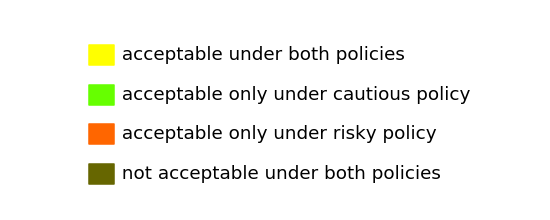

In [9]:
fig = plt.figure(figsize=(5,2))
ax = plt.gca()
ax.axis('off');  # clear x- and y-axes
prec=100

# colors
ov = 0.6
accept_underboth_color = (1.0, 1.0, 0.0)
accept_undercautious_color = (1.0-ov, 1.0, 0.0)
accept_underrisky_color = (1.0, 1.0-ov, 0.0)
accept_underno_color = (1.0-ov, 1.0-ov, 0.0)

# Legend
lfontsize = 12
dy = 0.18
legendtopbottom = 0.7
# - left column
left = 0.16
tuboth = fig.add_axes((left, legendtopbottom, 0.05,0.1), frameon=False,
                      xticks=[], yticks=[])
tuboth.fill_between(np.linspace(0,1,prec), 0, 1, color=accept_underboth_color)
tuboth.annotate(" acceptable under both policies", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)  
tusafe = fig.add_axes((left, legendtopbottom-dy, 0.05,0.1), frameon=False,
                      xticks=[], yticks=[])
tusafe.fill_between(np.linspace(0,1,prec), 0, 1, color=accept_undercautious_color)
tusafe.annotate(" acceptable only under cautious policy", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)  
turisky = fig.add_axes((left, legendtopbottom-2*dy, 0.05,0.1), frameon=False,
                       xticks=[], yticks=[])
turisky.fill_between(np.linspace(0,1,prec), 0, 1, color=accept_underrisky_color)
turisky.annotate(" acceptable only under risky policy", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)      
tuno = fig.add_axes((left, legendtopbottom-3*dy, 0.05,0.1), frameon=False,
                    xticks=[], yticks=[])
tuno.fill_between(np.linspace(0,1,prec), 0, 1, color=accept_underno_color)
tuno.annotate(" not acceptable under both policies", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize);
plt.savefig("AcceptableLegend.png")

### Interactive plot

In [10]:
interact(iplot_acceptal_states,
         δ=widgets.FloatSlider(min=0.0, max=1.0,
                               step=0.1, value=1.0),
         ρ=widgets.FloatSlider(min=0.0, max=1.0,
                               step=0.1, value=0.2),
         γ=widgets.FloatSlider(min=0.0, max=1.0,
                               step=0.1, value=1.0),
         rh=widgets.FloatSlider(min=0.0, max=2.0,
                                step=0.1, value=1.0),
         rl=widgets.FloatSlider(min=0.0, max=2.0,
                                step=0.1, value=0.5),
         rmin=widgets.FloatSlider(min=0.0, max=2.0,
                                  step=0.1, value=0.2),
         state=widgets.Dropdown(options=state_opts,
                                value="degraded"),
         xaxis=widgets.Dropdown(options=axis_opts, value="δ"),
         yaxis=widgets.Dropdown(options=axis_opts, value="γ"),
         prec=500);

interactive(children=(FloatSlider(value=1.0, description='δ', max=1.0), FloatSlider(value=0.2, description='ρ'…

<img src="AcceptableLegend.png">